In [37]:
from treelib import Tree, Node
import numpy as np
import json
import matplotlib.pyplot as plt
import os
import pickle
import sys
sys.path.insert(0, '/work/ccnr/glover.co/net_design/NetDesign/scripts')
import assembly_tree as at

In [38]:
def tree_depth(tree):
    if not isinstance(tree, dict) or not tree:
        return 0
    
    max_depth = 0
    for key, value in tree.items():
        if 'children' in value:
            for child in value['children']:
                max_depth = max(max_depth, tree_depth(child))
    
    return max_depth + 1

In [39]:

def load_tree(json_tree, depth=0, parent=None):
    k, value = list(json_tree.items())[0]
    tree = Tree()
    if parent is None:
        tree.create_node(tag=str(k), identifier=str(k)+str(depth))
        parent = tree.get_node(str(k)+str(depth))

    for counter,value in enumerate(json_tree[k]['children']):    
        if isinstance(json_tree[k]['children'][counter], str):
            tree.create_node(tag=value, identifier=value+str(depth), parent=parent)
        else:
            tree.create_node(tag=list(value)[0], identifier=list(value)[0]+str(depth), parent=parent)
            load_tree(json_tree[k]['children'][counter], depth+1, tree.get_node(list(value)[0]+str(depth)) )


In [40]:
protein_tree_dirs = os.listdir('/scratch/glover.co/NetDesign/data/proteins/trees/')

In [41]:
protein_path = '/scratch/glover.co/NetDesign/data/proteins/trees'
correct_protein_trees = np.zeros(len(protein_tree_dirs))
mi = np.zeros(len(protein_tree_dirs))
depth = np.zeros(len(protein_tree_dirs))
for i, d in enumerate(protein_tree_dirs):
    iso = np.loadtxt(f'{protein_path}/{d}/iso_flag.txt')
    with open(f'{protein_path}/{d}/mi.pickle','rb') as f:
        si = pickle.load(f)
    mi[i] = np.prod([v for k, v in si.items()])
    correct_protein_trees[i] = iso
    with open(f'{protein_path}/{d}/tree.json','rb') as f:
        tree_str = json.load(f)
        tree = json.loads(tree_str)
    if tree == 0:
        depth[i] = 0
    else:
        depth_val = tree_depth(tree)
        depth[i] = depth_val - 1

In [42]:
len(protein_tree_dirs)

1207

In [8]:
tree

{'0': {'data': [0, 1]}}

(array([  41.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1166.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

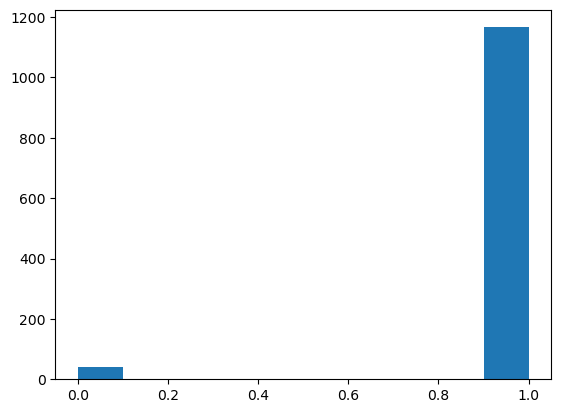

In [43]:
plt.hist(correct_protein_trees)

In [44]:
cor_idx = np.where(correct_protein_trees==1)[0]#[protein_tree_dirs[i] for i in np.where(correct_protein_trees==0)[0]]

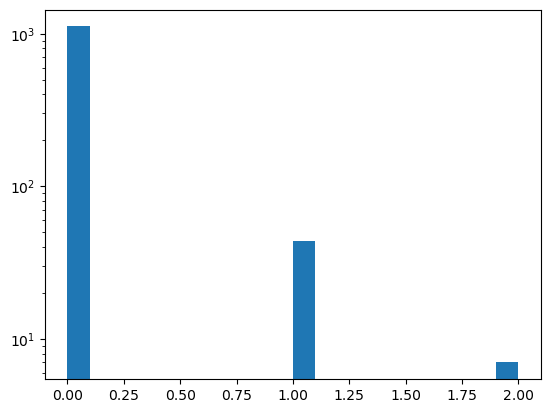

In [46]:
plt.hist(depth[cor_idx],bins=20)
plt.yscale('log')

In [47]:
with open('../data/nMEP.json','rb') as f:
    nMEP = json.load(f)

In [48]:
with open('../data/properties.json','rb') as f:
    properties = json.load(f)

In [49]:
prot_r = np.zeros(len(depth))
prot_rO = np.zeros(len(depth))
prot_N = np.zeros(len(depth))
prot_path = '/scratch/glover.co/NetDesign/data/proteins'
for i, idx in enumerate(np.arange(len(depth))):
    prot_id = protein_tree_dirs[idx]
    try:
        r = nMEP['proteins']['human'][prot_id]
        X = np.loadtxt(f'{prot_path}/human/Xfiles/X_{prot_id}.txt')
    except:
        try:
            r = nMEP['proteins']['mouse'][prot_id]
            X = np.loadtxt(f'{prot_path}/mouse/Xfiles/X_{prot_id}.txt')
        except:
            try:
                r = nMEP['proteins']['yeast'][prot_id]
                X = np.loadtxt(f'{prot_path}/yeast/Xfiles/X_{prot_id}.txt')
            except Exception as e:
                print(e)
                raise Exceptino
    prot_r[i] = r
    prot_rO[i] = X.shape[1]
    prot_N[i] = X.shape[0]

In [50]:
colors = ["#FFD400","#84ACCE","#827191","#7D1D3F"]
#["lego","proteins","molecules","econets"]

In [51]:
prot_div = (prot_rO - prot_r) / prot_N

In [52]:
no_dimers = np.intersect1d(np.where(prot_N > 3)[0],cor_idx)

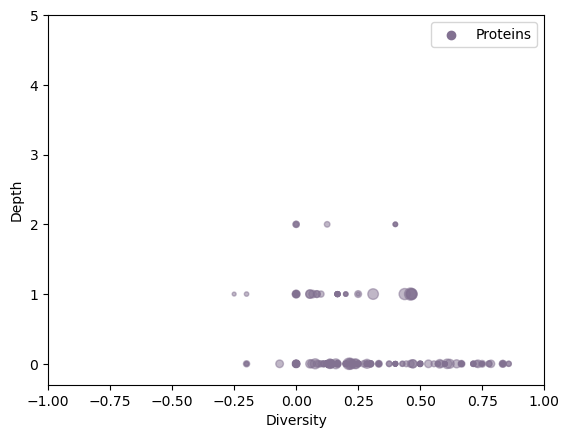

In [219]:
plt.scatter(prot_div[no_dimers],depth[no_dimers],alpha=.5,s=prot_N[no_dimers]*2,color=colors[2])
plt.scatter([],[],label='Proteins',color=colors[2])
plt.xlim(-1,1)
plt.ylim(-.3,5)
plt.xlabel('Diversity')
plt.ylabel('Depth')
plt.legend()
plt.savefig('phase_plot_protein.pdf')
plt.show()

In [218]:
np.where(depth[cor_idx] == 2), len(protein_tree_dirs) - len(cor_idx)

((array([125, 161, 336, 339, 509, 723, 953]),), 41)

In [181]:
np.array([protein_tree_dirs[i] for i in cor_idx])[723]

'CPX-5961'

In [74]:
prot_N[278]

22.0

In [109]:
np.argmax(depth[cor_idx])

278

In [111]:
np.array([protein_tree_dirs[i] for i in cor_idx])[278]

'CPX-1939'

In [161]:
file = '/scratch/glover.co/NetDesign/data/proteins/yeast/edgefiles/CPX-1939.edge'
X_file = '/scratch/glover.co/NetDesign/data/proteins/yeast/Xfiles/X_CPX-1939.txt' 

In [148]:
import networkx as nx
with open(f'{protein_path}/CPX-1939/tree.json','rb') as f:
    deep_tree = json.load(f)

In [162]:
g = nx.read_edgelist(file,nodetype=int)
X = np.loadtxt(X_file)
O = at.extract_O(g,X)
deg_cap = at.extract_deg_cap(g,X)

In [157]:
O.sum(axis=1) == deg_cap.T

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True]])

In [163]:
# Add edge capacities
nx.set_edge_attributes(g,1,'capacity')

In [ ]:
assembly_graphs, si, disassembly_tree = at.approx_assembly_tree(g,X,O,deg_cap,multiedge=bool('False'))

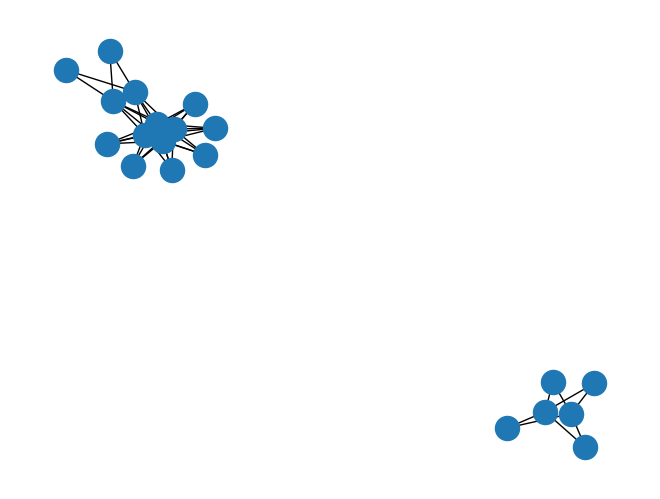

In [159]:
nx.draw(assembly_graphs[0])

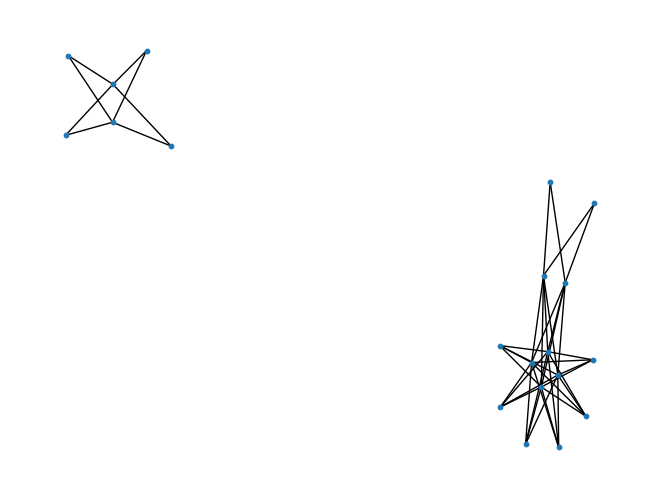

In [150]:
nx.draw(g,node_size=10)

In [182]:
molecule_tree_dirs = os.listdir('/scratch/glover.co/NetDesign/data/Molecules/trees/')

In [183]:
molecule_path = '/scratch/glover.co/NetDesign/data/Molecules/trees'
correct_molecule_trees = np.zeros(len(molecule_tree_dirs))
mi_molecule = np.zeros(len(molecule_tree_dirs))
depth_molecule = np.zeros(len(molecule_tree_dirs))
for i, d in enumerate(molecule_tree_dirs):
    iso = np.loadtxt(f'{molecule_path}/{d}/iso_flag.txt')
    with open(f'{molecule_path}/{d}/mi.pickle','rb') as f:
        si = pickle.load(f)
    mi_molecule[i] = np.prod([v for k, v in si.items()])
    correct_molecule_trees[i] = iso
    with open(f'{molecule_path}/{d}/tree.json','rb') as f:
        tree_str = json.load(f)
        tree = json.loads(tree_str)
    if tree == 0:
        depth_molecule[i] = 0
    else:
        depth_val = tree_depth(tree)
        depth_molecule[i] = depth_val - 1

(array([145.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   6.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

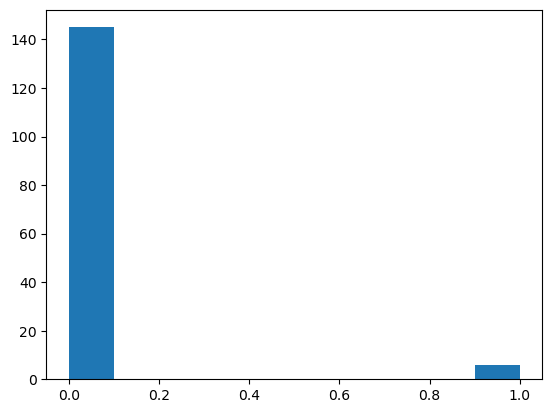

In [184]:
plt.hist(correct_molecule_trees)

In [187]:
idx = np.where(correct_molecule_trees==1)[0]

In [189]:
molecule_tree_dirs[idx[4]]

'CID_1176'

In [188]:
depth_molecule[idx]

array([0., 1., 0., 0., 4., 0.])

In [84]:
with open('../data/classA.json','rb') as f:
    class_A = json.load(f)
with open('../data/classB.json','rb') as f:
    class_B = json.load(f)
with open('../data/classC.json','rb') as f:
    class_C = json.load(f)

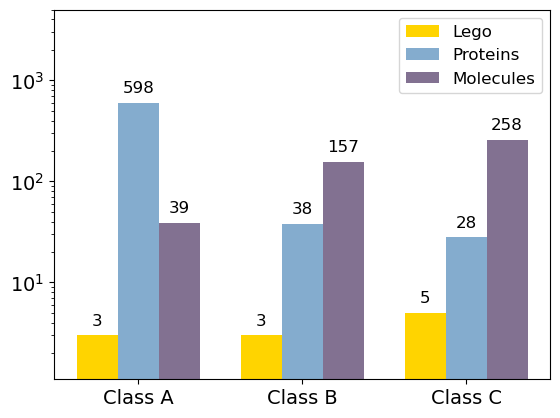

In [132]:
Al = plt.bar(0,len(class_A['lego']),width=1,color=colors[0],label='Lego')
Ap = plt.bar(1,len(class_A['proteins']),width=1,color=colors[1],label='Proteins')
Am = plt.bar(2,len(class_A['molecules']),width=1,color=colors[2],label='Molecules')
Bl = plt.bar(4,len(class_B['lego']),width=1,color=colors[0])
Bp = plt.bar(5,len(class_B['proteins']),width=1,color=colors[1])
Bm = plt.bar(6,len(class_B['molecules']),width=1,color=colors[2])
Cl = plt.bar(8,len(class_C['lego']),width=1,color=colors[0])
Cp = plt.bar(9,len(class_C['proteins']),width=1,color=colors[1])
Cm = plt.bar(10,len(class_C['molecules']),width=1,color=colors[2])
plt.bar_label(Al,padding=5,fontsize=12)
plt.bar_label(Ap,padding=5,fontsize=12)
plt.bar_label(Am,padding=5,fontsize=12)
plt.bar_label(Bl,padding=5,fontsize=12)
plt.bar_label(Bp,padding=5,fontsize=12)
plt.bar_label(Bm,padding=5,fontsize=12)
plt.bar_label(Cl,padding=5,fontsize=12)
plt.bar_label(Cp,padding=5,fontsize=12)
plt.bar_label(Cm,padding=5,fontsize=12)
plt.legend(loc='upper right',fontsize=12)
plt.yscale('log')
plt.ylim(1.1,5000)
plt.xticks([1,5,9],['Class A','Class B','Class C'],fontsize=14)
plt.yticks([10,100,1000],['$10^1$','$10^2$','$10^3$'],fontsize=14)
plt.savefig('class_hist.pdf')
plt.show()

In [123]:
class_B['molecules']

[['molecules', 'WHO', 'CID_10103319'],
 ['molecules', 'WHO', 'CID_10221470'],
 ['molecules', 'WHO', 'CID_1031'],
 ['molecules', 'WHO', 'CID_1046'],
 ['molecules', 'WHO', 'CID_11024312'],
 ['molecules', 'WHO', 'CID_1116159'],
 ['molecules', 'WHO', 'CID_1116160'],
 ['molecules', 'WHO', 'CID_11333'],
 ['molecules', 'WHO', 'CID_11358077'],
 ['molecules', 'WHO', 'CID_115056'],
 ['molecules', 'WHO', 'CID_11832956'],
 ['molecules', 'WHO', 'CID_118705487'],
 ['molecules', 'WHO', 'CID_122173797'],
 ['molecules', 'WHO', 'CID_12620'],
 ['molecules', 'WHO', 'CID_12675'],
 ['molecules', 'WHO', 'CID_131704316'],
 ['molecules', 'WHO', 'CID_131839611'],
 ['molecules', 'WHO', 'CID_132477936'],
 ['molecules', 'WHO', 'CID_132935795'],
 ['molecules', 'WHO', 'CID_13916'],
 ['molecules', 'WHO', 'CID_14052'],
 ['molecules', 'WHO', 'CID_14250'],
 ['molecules', 'WHO', 'CID_14251'],
 ['molecules', 'WHO', 'CID_146157093'],
 ['molecules', 'WHO', 'CID_154701625'],
 ['molecules', 'WHO', 'CID_157355'],
 ['molecules'

In [207]:
import networkx as nx
g = nx.Graph()
g.add_edges_from([[0,1],[1,2],[2,0],
                  [3,4],[4,5],[5,3],
                  [6,7],[7,8],[8,6],
                  [9,10],[10,11],[11,9],
                  [0,3],[6,9],
                  [0,13],[3,13],
                  [6,14],[9,14],
                  [13,14]])

In [209]:
X = np.zeros((15,3))
X[0,0] = 1
X[3,0] = 1
X[9,0] = 1
X[6,0] = 1
X[13,1] = 1
X[14,1] = 1
X[1,2] = 1
X[2,2] = 1
X[4,2] = 1
X[5,2] = 1
X[7,2] = 1
X[8,2] = 1
X[10,2] = 1
X[11,2] = 1

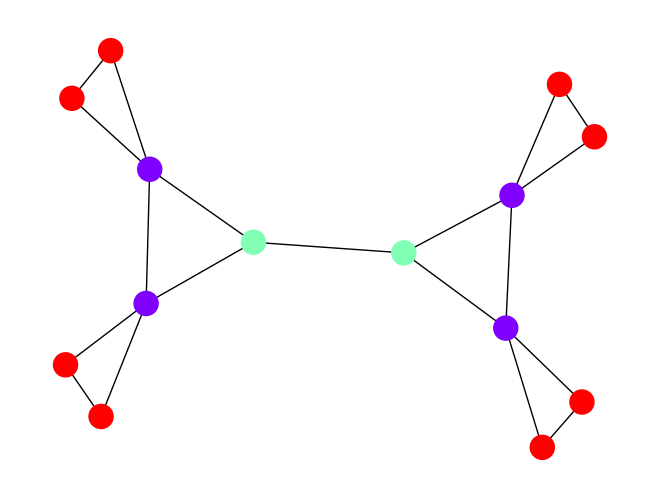

In [210]:
at.draw_network(g,X)

In [211]:
deg_cap = at.extract_deg_cap(g,X)
O = at.extract_O(g,X)

In [212]:
vi, cur_graphs = at.measure_stability(X,O,ret_g=True,deg_cap=deg_cap)

In [213]:
vi

454

In [215]:
nx.set_edge_attributes(g,1,'capacity')

In [216]:
assembly_graphs, vi, tree = at.approx_assembly_tree(g,X,O,deg_cap=deg_cap)

KeyboardInterrupt: 